# Kaplan-Meier survival analysis: appropriate ICD-therapy

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import multivariate_logrank_test
from matplotlib.patches import Patch
import warnings
import matplotlib.cbook
from matplotlib import MatplotlibDeprecationWarning

In [208]:
def create_nature_palette():
    colors = [
        '#DC000099',  # Red
        '#00A087FF',  # Green
        (0.85, 0.65, 0.13),  # Yellow
        '#8491B4FF',  # Blue
        '#7E6148FF',  # Brown
    ]
    cmap_name = 'nature_palette'
    nature_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))
    return nature_cmap
nature_palette = create_nature_palette()

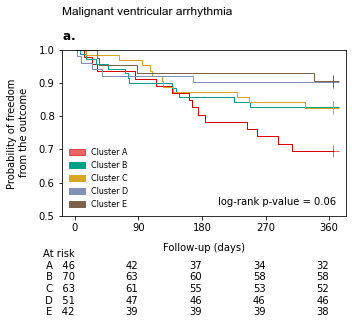

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           8.86 0.06      3.95


In [265]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
plt.figure(figsize=(5, 5))  # Adjust width and height as needed
ax = plt.subplot(111)
from matplotlib.offsetbox import AnchoredText

a = clustered['cluster'] == 'A'
b = clustered['cluster'] == 'B'
c = clustered['cluster'] == 'C'
d = clustered['cluster'] == 'D'
e = clustered['cluster'] == 'E'

p = 'log-rank p-value = 0.06'
clusters_nr = ['A', 'B', 'C', 'D', 'E']
cmap = plt.cm.get_cmap('viridis', len(clusters_nr))
cmap = nature_palette
colors = cmap(range(len(clusters_nr)))

linewidth = 1
alpha =1
kmf_a = KaplanMeierFitter()
ax = kmf_a.fit(clustered.loc[a]['Dtillappropriatetherapy'], clustered.loc[a]['ICD_therapy'], label=' A').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth,
                                       
                                                                                                                                color=colors[0], show_censors=True)
kmf_b = KaplanMeierFitter()
ax = kmf_b.fit(clustered.loc[b]['Dtillappropriatetherapy'], clustered.loc[b]['ICD_therapy'], label=' B').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[1],
                                                                                                                              show_censors=True)
kmf_c = KaplanMeierFitter()
ax = kmf_c.fit(clustered.loc[c]['Dtillappropriatetherapy'], clustered.loc[c]['ICD_therapy'], label=' C').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[2],
                                                                                                                              show_censors=True)
kmf_d = KaplanMeierFitter()
ax = kmf_d.fit(clustered.loc[d]['Dtillappropriatetherapy'], clustered.loc[d]['ICD_therapy'], label=' D').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidt
                                                                                                                                h, color=colors[3],
                                                                                                                              show_censors=True)kmf_e = KaplanMeierFitter()
ax = kmf_e.fit(clustered.loc[e]['Dtillappropriatetherapy'], clustered.loc[e]['ICD_therapy'], label=' E').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[4],
                                                                                                                              show_censors=True)

legend_handles = [Patch(color=colors[i], label=f'Cluster {clusters_nr[i]}') for i in range(len(clusters_nr))]
ax.legend(handles=legend_handles, frameon=False,fontsize=8)
add_at_risk_counts(kmf_a, kmf_b, kmf_c, kmf_d, kmf_e, ax=ax, rows_to_show=["At risk"], ypos=-0.6, xticks=[0, 90, 180, 270, 360])
ax.set_xlabel('Follow-up (days)', labelpad=10)
ax.set_ylabel('Probability of freedom \nfrom the outcome', labelpad=10)
ax.add_artist(AnchoredText(p, loc=4, frameon=False))
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_ylim(0.5,1 )
plt.title(r'Malignant ventricular arrhythmia' + '\n\n' + r'$\bf{a.}$', loc='left', pad=10, fontsize=12, fontname="Arial")
plt.tight_layout()
plt.show()

result = multivariate_logrank_test(clustered['Dtillappropriatetherapy'], clustered['cluster'], clustered['ICD_therapy'])
print(result)

# Kaplan-Meier survival analysis: composite

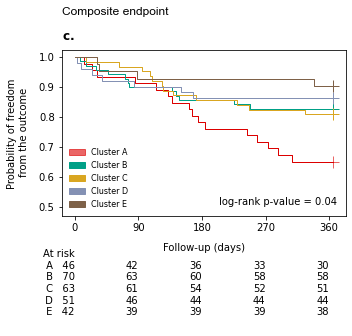

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
          10.32 0.04      4.82


In [263]:
clinical_processed_all = clinical_processed_all[['SubjectCode','ICD_therapy', 'Inapp_therapy', 'Mortality',  'Dtillappropriatetherapy', 'Dtillinappropriatetherapy', 'Dtillmortality']]
clustered = clustered[['SubjectCode', 'cluster']]
clustered = clinical_processed_all.merge(clustered, on='SubjectCode', how='left')
clustered['DtillComposite'] = clustered[['Dtillappropriatetherapy', 'Dtillinappropriatetherapy', 'Dtillmortality']].min(axis=1)
clustered['Composite'] = clustered[['ICD_therapy', 'Inapp_therapy', 'Mortality']].sum(axis=1)
clustered['Composite'] = clustered['Composite'].apply(lambda x: 1 if x > 1 else x)

time = 'DtillComposite'
event = 'Composite'

plt.figure(figsize=(5, 5))
ax = plt.subplot(111)

a = clustered['cluster'] == 'A'
b = clustered['cluster'] == 'B'
c = clustered['cluster'] == 'C'
d = clustered['cluster'] == 'D'
e = clustered['cluster'] == 'E'

p = 'log-rank p-value = 0.04'

cmap = plt.cm.get_cmap('viridis', len(clusters_nr))
cmap = nature_palette

colors = cmap(range(len(clusters_nr)))

kmf_a = KaplanMeierFitter()
ax = kmf_a.fit(clustered.loc[a][time], clustered.loc[a][event], label=' A').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth,
                                                                                                                              color=colors[0], show_censors=True)

kmf_b = KaplanMeierFitter()
ax = kmf_b.fit(clustered.loc[b][time], clustered.loc[b][event], label=' B').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[1],
                                                                                                                              show_censors=True)

kmf_c = KaplanMeierFitter()
ax = kmf_c.fit(clustered.loc[c][time], clustered.loc[c][event], label=' C').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[2],
                                                                                                                              show_censors=True)

kmf_d = KaplanMeierFitter()
ax = kmf_d.fit(clustered.loc[d][time], clustered.loc[d][event], label=' D').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[3],
                                                                                                                              show_censors=True)

kmf_e = KaplanMeierFitter()
ax = kmf_e.fit(clustered.loc[e][time], clustered.loc[e][event], label=' E').plot_survival_function(ax=ax, ci_alpha=0.0, alpha=alpha,
                                                                                                                              linewidth=linewidth, color=colors[4],
                                                                                                                              show_censors=True)



legend_handles = [Patch(color=colors[i], label=f'Cluster {clusters_nr[i]}') for i in range(len(clusters_nr))]
ax.legend(handles=legend_handles, frameon=False,fontsize=8)

add_at_risk_counts(kmf_a, kmf_b, kmf_c, kmf_d, kmf_e, ax=ax, rows_to_show=["At risk"], ypos=-0.6, xticks=[0, 90, 180, 270, 360])
ax.set_xlabel('Follow-up (days)',  labelpad=10)
ax.set_ylabel('Probability of freedom \nfrom the outcome', labelpad=10)
ax.add_artist(AnchoredText(p, loc=4, frameon=False))
ax.set_xticks([0, 90, 180, 270, 360])
plt.title(r'Composite endpoint' + '\n\n' + r'$\bf{c.}$', loc='left', pad=10, fontsize=12, fontname="Arial")
plt.tight_layout()
plt.show()

result = multivariate_logrank_test(clustered['DtillComposite'], clustered['cluster'], clustered['Composite'])
print(result)

# Cox Proportional Hazards: appropriate ICD-therapy 

C:\Users\mzkolk\AppData\Local\Temp\ipykernel_40392\909230830.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90, ha='right')
C:\Users\mzkolk\AppData\Local\Temp\ipykernel_40392\909230830.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'], color='cornflowerblue')


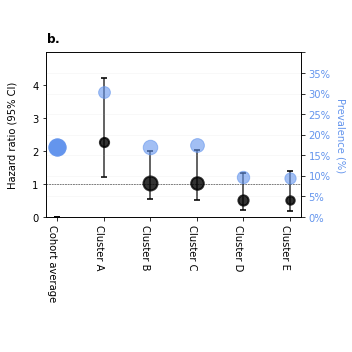

C:\Users\mzkolk\AppData\Local\Temp\ipykernel_40392\909230830.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'], color='darkseagreen')
C:\Users\mzkolk\AppData\Local\Temp\ipykernel_40392\909230830.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90, ha='right')


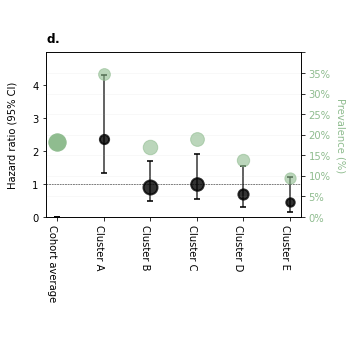

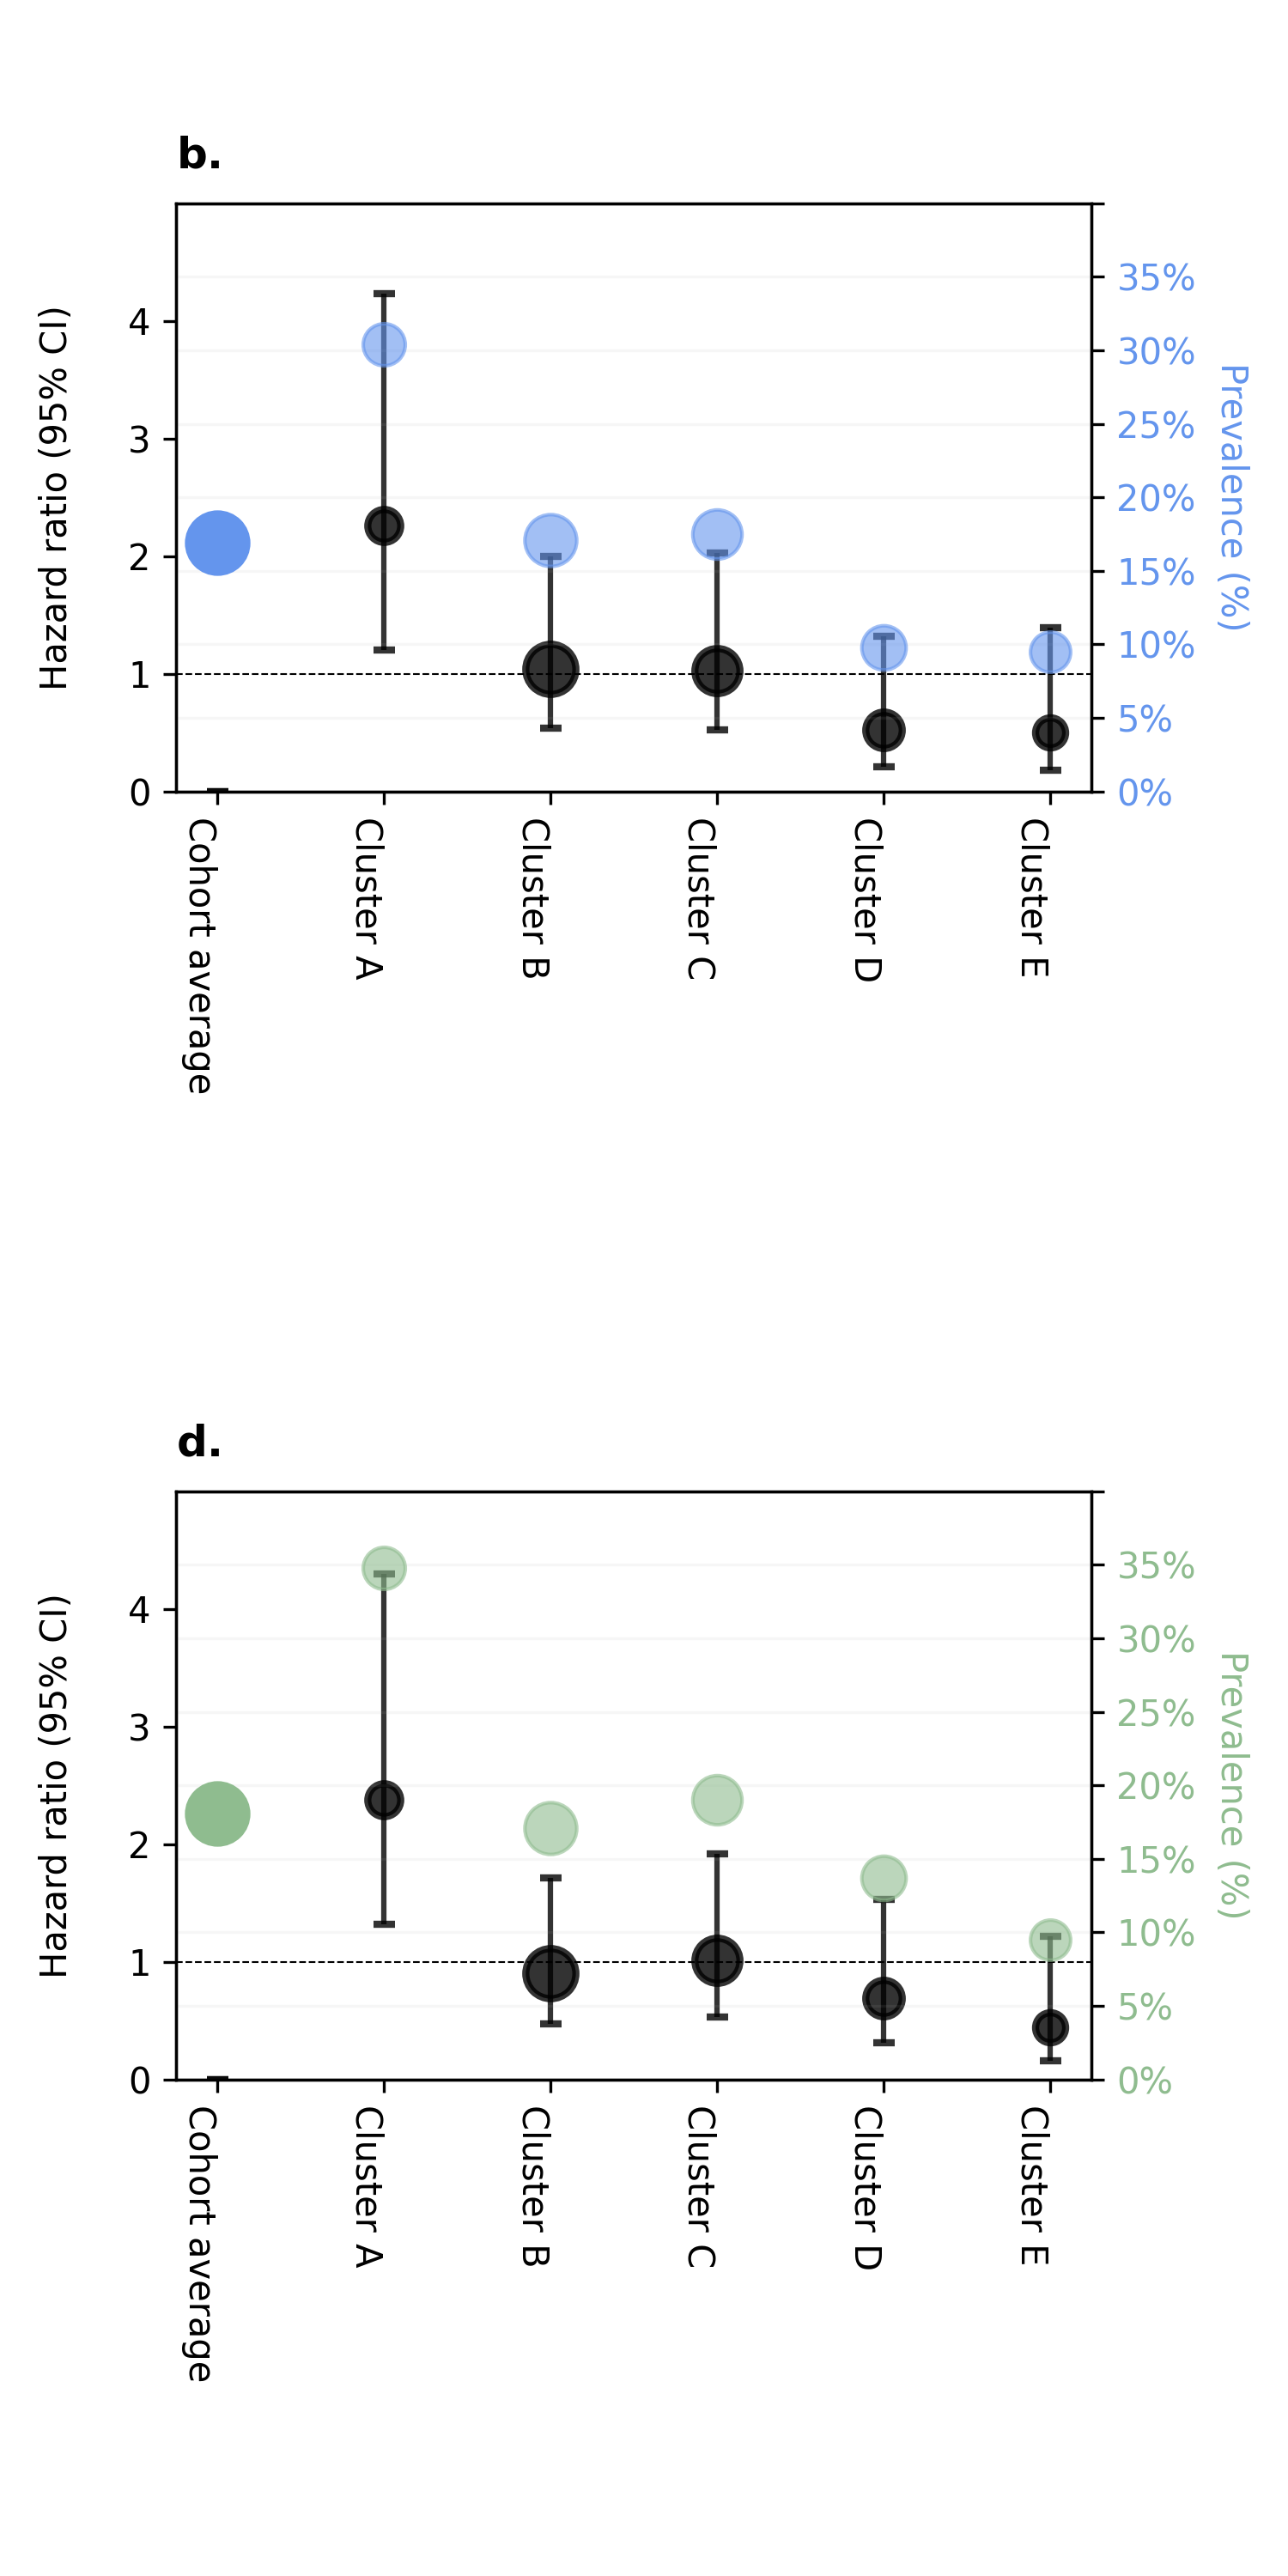

In [6]:
clusters = ['Cohort average              ', 'Cluster A', 'Cluster B', 'Cluster C', 'Cluster D', 'Cluster E']
n = [0, 46, 70, 63, 51, 42]
icd_therapy_hr = [0, 2.26, 1.04, 1.03, 0.52, 0.50]
icd_therapy_ci = [(0,0), (1.20, 4.23), (0.54, 2.00), (0.52, 2.03), (0.21, 1.32), (0.18, 1.39)]
icd_therapy_prevalence = [16.9, 30.4, 17.1, 17.5, 9.8, 9.5]
icd_therapy_errors = np.array(icd_therapy_ci).T

# Plotting
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5))  # Two subplots side by side

distances = [1, 1]
icd_therapy_lower_error = [icd_therapy_hr[i] - icd_therapy_ci[i][0] for i in range(len(icd_therapy_hr))]
icd_therapy_upper_error = [icd_therapy_ci[i][1] - icd_therapy_hr[i] for i in range(len(icd_therapy_hr))]
cluster_sizes_icd = [n[clusters.index(cluster)] for cluster in clusters]  # Get cluster sizes for ICD

for i in range(len(clusters)):
    ax1.errorbar(clusters[i], icd_therapy_hr[i],
                 yerr=[[icd_therapy_lower_error[i]], [icd_therapy_upper_error[i]]], color='black', alpha=.8,
                 markeredgewidth=2, fmt='o', label='ICD Therapy', capsize=3, markersize=cluster_sizes_icd[i] /5)

ax2 = ax1.twinx()
alphas=[1, 0.6,0.6, 0.6, 0.6,0.6]
cluster_sizes_icd[0] = 100
for i in range(len(clusters)):
    ax2.scatter(clusters[i], icd_therapy_prevalence[i], color='cornflowerblue', s=cluster_sizes_icd[i]*3, zorder=5, alpha=alphas[i])
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(['0', '1', '2', '3', '4'])
ax1.set_ylim(0, 5)
ax2.set_ylim(0, 40)
ax1.set_ylabel('Hazard ratio (95% CI)', labelpad=15, color='black')
ax2.set_ylabel('Prevalence (%)',  color='cornflowerblue', rotation=-90, labelpad=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90, ha='right')
ax2.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'], color='cornflowerblue')

plt.grid(alpha=0.1)
ax1.axhline(y=1, linestyle='--', color='black', linewidth=.5)
plt.title(r'$\bf{b.}$ ', loc='left', pad=10,  fontsize=12, fontname="Arial")
plt.title(r' ' + '\n\n' + r'$\bf{b.}$', loc='left', pad=10, fontsize=12, fontname="Arial")
plt.tight_layout()
plt.show()

clusters = ['Cohort average              ', 'Cluster A', 'Cluster B', 'Cluster C', 'Cluster D', 'Cluster E']
n = [0, 46, 70, 63, 51, 42]
icd_therapy_hr = [0, 2.38, 0.90, 1.01, 0.69, 0.44]
icd_therapy_ci = [(0,0), (1.32, 4.30), (0.47, 1.71), (0.53, 1.92), (0.31, 1.53), (0.16, 1.22)]
icd_therapy_prevalence = [18.1, 34.8, 17.1, 19.0, 13.7, 9.5]
icd_therapy_errors = np.array(icd_therapy_ci).T

fig, (ax1) = plt.subplots(1, 1, figsize=(5,5))  # Two subplots side by side
distances = [1, 1]
icd_therapy_lower_error = [icd_therapy_hr[i] - icd_therapy_ci[i][0] for i in range(len(icd_therapy_hr))]
icd_therapy_upper_error = [icd_therapy_ci[i][1] - icd_therapy_hr[i] for i in range(len(icd_therapy_hr))]
cluster_sizes_icd = [n[clusters.index(cluster)] for cluster in clusters]  # Get cluster sizes for ICD

for i in range(len(clusters)):
    ax1.errorbar(clusters[i], icd_therapy_hr[i],
                 yerr=[[icd_therapy_lower_error[i]], [icd_therapy_upper_error[i]]], color='black', alpha=.8,
                 markeredgewidth=2, fmt='o', label='ICD Therapy', capsize=3, markersize=cluster_sizes_icd[i] /5)

ax2 = ax1.twinx()
alphas=[1, 0.6,0.6, 0.6, 0.6,0.6]
cluster_sizes_icd[0] = 100
for i in range(len(clusters)):
    ax2.scatter(clusters[i], icd_therapy_prevalence[i], color='darkseagreen', s=cluster_sizes_icd[i]*3, zorder=5, alpha=alphas[i])
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(['0', '1', '2', '3', '4'])
ax2.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'], color='darkseagreen')

ax1.set_ylim(0, 5)
ax2.set_ylim(0, 40)
ax1.set_ylabel('Hazard ratio (95% CI)', labelpad=15, color='black')
ax2.set_ylabel('Prevalence (%)',  color='darkseagreen', rotation=-90, labelpad=15)
plt.grid(alpha=0.1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-90, ha='right')
ax1.axhline(y=1, linestyle='--', color='black', linewidth=.5)
plt.title(r'Composite endpoint' + '\n\n' +'$\bf{d.}$', loc='left', pad=10,  fontsize=12, fontname="Arial")
plt.title(r' ' + '\n\n' + r'$\bf{d.}$', loc='left', pad=10, fontsize=12, fontname="Arial")
plt.tight_layout()
plt.show()